# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [1]:
from numpy import *
from numpy.linalg import *


from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *
import matplotlib.transforms as transforms

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [2]:
L = 0.5
R_w=0.3

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

<span style="color:red">**Vous utilisez plt.plot au lieu de plot... Les figures qui étaient initialment présentées ne vont vraiment pas...**</span>

In [3]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import matplotlib.transforms as transforms
from matplotlib.transforms import Affine2D
def draw_wheelchair(x, y, theta):
    # Define the center point and side length of the square
    side_length = L
    # Calculate the coordinates of the bottom left corner of the square
    x_corner = x - side_length / 2
    y_corner = y - side_length / 2

    # Create a Rectangle object with the calculated coordinates and side length
    square = Rectangle((x_corner, y_corner), side_length, side_length, linewidth=1, edgecolor='r', facecolor='red')
    line1 = Line2D([x-R_w, x + R_w ], [y-side_length/2, y - side_length / 2], linewidth=1, color='b')
    line2 = Line2D([x-R_w, x + R_w ], [y+side_length/2, y + side_length / 2], linewidth=1, color='b')

    # Create a transformation that rotates the square around its center point
    #rotation = transforms.Affine2D().rotate_deg(theta).translate(x, y)
    transform = Affine2D().rotate_deg_around(x, y, theta)
    # Apply the rotation transformation to the square
    
    # Create a figure and axis object
    
    fig,ax = plt.subplots()

    # Add the square to the axis
    ax.add_patch(square)
    ax.add_patch(line1)
    ax.add_patch(line2)
    
    square.set_transform(transform+ ax.transData)
    line1.set_transform(transform+ ax.transData)
    line2.set_transform(transform+ ax.transData)

    # Set the x and y limits of the axis to show the entire square
    ax.set_xlim(x -side_length- 1, x + side_length + 1)
    ax.set_ylim(y -side_length- 1, y + side_length + 1)
    # Show the plot
    plt.grid()
    plt.show()
draw_wheelchair(0,0,10)

NameError: name 'plt' is not defined

In [4]:
draw_wheelchair(0,0,0)
draw_wheelchair(-2,2,np.pi/2)
draw_wheelchair(0,4,np.pi)
draw_wheelchair(-2,2,3*np.pi/2)


NameError: name 'plt' is not defined

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [6]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

**Answer:**

In [7]:
pass

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:** Vx=R*(𝜔𝑙+𝜔𝑟)*cos(𝜃); 
Vy=R*(𝜔𝑙+𝜔𝑟)*sin(𝜃) ;  
𝜃˙=R/L*(𝜔𝑟-𝜔𝑙)

<span style="color:red">**Explications ?**</span>

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:** 
ωR = 1/2R * (∂x/∂t cos(θ) + ∂y/∂t sin(θ)) + 1/2L * (∂θ/∂t)
ωL = 1/2R * (∂x/∂t cos(θ) + ∂y/∂t sin(θ)) - 1/2L * (∂θ/∂t)
Since ωR and ωL are expressed in terms of Vx, Vy, and θ, which are all continuously differentiable functions of (x, y, θ), it follows that ωR and ωL are also continuously differentiable functions of (x, y, θ).

<span style="color:red">**Je ne comprends pas le raisonnement... L'hypothèse de base est que les vitesses de rotations sont bien C1, et vous essayer de démontrer qu'elles le sont... ?**</span>



🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:** 
If ωL and ωR are constants
x(t) = x0 + R/2 * (ωR + ωL) * cos(θ0) * t
y(t) = y0 + R/2 * (ωR + ωL) * sin(θ0) * t
θ(t) = θ0 + R/L * (ωR - ωL) * t

<span style="color:red">**???**</span>

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [8]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

<span style="color:red">**Votre fonction fun ne fait pas ce qu'il faut. Il faut aussi retourner la dérivée de theta. D'ailleurs, on ne sait pas d'où vient theta dans votre fonction (il aurait fallu l'extraire de la variable xytheta...)**</span>

In [13]:
def fun(t, xytheta):
    𝜔𝑙,𝜔𝑟=omega(t, xytheta)
    Vx=R*(𝜔𝑙+𝜔𝑟)*cos(𝜃)
    Vy=R*(𝜔𝑙+𝜔𝑟)*sin(𝜃)
    return array([Vx, Vy])

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)

<span style="color:red">**Rien ne va dans la suite... Il fallait faire la simulation avec le solveur d'équa diff solve_ivp...**</span>
   

In [14]:
𝜔L=(1-L/4)*np.pi/𝑅_w
𝜔r=(1+L/4)*np.pi/𝑅_w
θ0=0
X_etat=[]
Y_etat=[]
theta_etat=[]
for t in range(4):
    x =  𝑅_w/2 * (ωr + ωL) * cos(θ0) * t
    y = 𝑅_w/2 * (ωr + ωL) * sin(θ0) * t
    θ = θ0 + R_w/L * (ωr - ωL) * t
    X_etat.append(x)
    Y_etat.append(y)
    theta_etat.append(θ)
print(etat)

NameError: name 'etat' is not defined

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

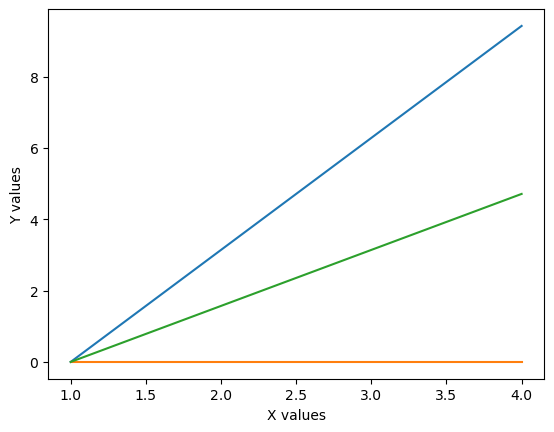

In [15]:
import matplotlib.pyplot as plt

# List of x-coordinates
x_values = [ 1, 2, 3, 4]


# Plot the data as a line graph
plt.plot(x_values, X_etat)
plt.plot(x_values, Y_etat)
plt.plot(x_values, theta_etat)

# Add labels for the x-axis and y-axis
plt.xlabel('X values')
plt.ylabel('Y values')

# Show the plot
plt.show()

🧩 Use the simulation results to display the robot location every 0.5 second.

In [16]:
pass

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [ ]:
pass

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [ ]:
pass